In [1]:
import pandas as pd

In [2]:
start = 2013
end = 2021

path = 'xlsx/hydro-reservoir_{}_weekly.xlsx'

files = {}
for year in range(start, end+1):
    file = pd.read_excel(path.format(year))
    files[year] = file
    

for year in files.keys():
    print(files[year].head())

  Unnamed: 0     NO     SE    FI
0    02 - 13  54099  20521  3793
1    03 - 13  51059  19122  3621
2    04 - 13  48117  17706  3471
3    05 - 13  45906  16650  3393
4    06 - 13  43302  15356  3202
  Unnamed: 0     NO     SE    FI
0    02 - 14  53881  21425  3768
1    03 - 14  51076  20255  3704
2    04 - 14  48377  18972  3591
3    05 - 14  45710  17688  3459
4    06 - 14  43538  16616  3332
  Unnamed: 0     NO     SE    FI
0    02 - 15  53780  19180  3406
1    03 - 15  51907  18458  3324
2    04 - 15  49084  17283  3209
3    05 - 15  46803  16448  3127
4    06 - 15  44087  15350  2986
  Unnamed: 0     NO     SE    FI
0    01 - 17  64848  22522  4110
1    02 - 16  61654  21203  3996
2    03 - 16  58235  19811  3840
3    04 - 16  56990  18956  3746
4    05 - 16  55266  17939  3598
  Unnamed: 0     NO     SE    FI
0    01 - 18  51959  17222  3415
1    02 - 17  50102  16533  3328
2    03 - 17  48484  15735  3213
3    04 - 17  46780  15049  3073
4    05 - 17  44240  14159  2929
  Unnamed:

In [3]:
#Concatenating all hydro levels
all_levels = None
first = True

for year in files.keys():
    if first:
        first = False
        all_levels = files[year]
    else:
        all_levels = pd.concat([all_levels, files[year]])

all_levels.describe()

,NO,SE,FI
count,467.000000,467.000000,467.000000
mean,53151.475375,19546.631692,3387.734475
std,15420.261930,6753.602807,695.446565
min,20539.000000,5388.000000,1560.000000
25%,39721.500000,13965.000000,2970.000000
50%,56328.000000,21425.000000,3539.000000
75%,64756.000000,24519.000000,3921.500000
max,83280.000000,30694.000000,4512.000000


In [4]:
#Adding seperate columns for year and week to have a smooth concatenation with the dates
all_levels['year'] = 0
all_levels['week'] = 0

rows = len(all_levels)

for row in range(rows):
    all_levels['week'].iloc[row] = all_levels['Unnamed: 0'].iloc[row][:2]
    all_levels['year'].iloc[row] = int('20' + str(all_levels['Unnamed: 0'].iloc[row][5:]))
    
#Must make the last row identical to the second last row, since the last row is 
all_levels.interpolate(inplace=True)


all_levels.describe()

/Users/erlingstraybugge/miniforge3/envs/env_tf/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,NO,SE,FI,year
count,468.000000,468.000000,468.000000,468.000000
mean,53145.737179,19551.730769,3388.059829,2017.014957
std,15404.243354,6747.269873,694.737231,2.586779
min,20539.000000,5388.000000,1560.000000,2013.000000
25%,39730.750000,13974.500000,2970.500000,2015.000000
50%,56307.000000,21433.500000,3539.500000,2017.000000
75%,64753.000000,24517.000000,3919.250000,2019.000000
max,83280.000000,30694.000000,4512.000000,2022.000000


In [5]:
#Must ad date column for first date of the week in all_levels['date']

#Creating a formated datestring
all_levels['date_string'] = all_levels['year'].astype(str) + '-' + all_levels['week'].astype(str) + '-1 00'

#Creating datetime object
all_levels['datetime'] = all_levels['date_string'].apply(lambda x: pd.to_datetime(x, format='%Y-%W-%w %H'))

#Setting the hour of the datetime object to 00:00
all_levels['datetime'].apply(lambda x: x.replace(hour=0))

all_levels.describe()

,NO,SE,FI,year
count,468.000000,468.000000,468.000000,468.000000
mean,53145.737179,19551.730769,3388.059829,2017.014957
std,15404.243354,6747.269873,694.737231,2.586779
min,20539.000000,5388.000000,1560.000000,2013.000000
25%,39730.750000,13974.500000,2970.500000,2015.000000
50%,56307.000000,21433.500000,3539.500000,2017.000000
75%,64753.000000,24517.000000,3919.250000,2019.000000
max,83280.000000,30694.000000,4512.000000,2022.000000


In [6]:
#Now, matching on dates, importing the dates.csv-file

import numpy as np

dates_df = pd.read_csv('dates.csv')
additional_cols = ['NO', 'SE', 'FI']
for col in additional_cols:
    dates_df[col] = np.nan

dates_df

,Unnamed: 0,datetime,NO,SE,FI
0,0,2013-01-01 00:00:00,NaN,NaN,NaN
1,1,2013-01-01 01:00:00,NaN,NaN,NaN
2,2,2013-01-01 02:00:00,NaN,NaN,NaN
3,3,2013-01-01 03:00:00,NaN,NaN,NaN
4,4,2013-01-01 04:00:00,NaN,NaN,NaN
...,...,...,...,...,...
78892,8756,2021-12-31 19:00:00,NaN,NaN,NaN
78893,8757,2021-12-31 20:00:00,NaN,NaN,NaN
78894,8758,2021-12-31 21:00:00,NaN,NaN,NaN
78895,8759,2021-12-31 22:00:00,NaN,NaN,NaN


In [7]:
#Making all the strings in dates_df to hour
#Must first get hour from elspot-fetch-file

dates_df['timestamp'] = None
dates_df['timestamp'] = dates_df['datetime'].apply(lambda x: pd.to_datetime(x))

print(dates_df['timestamp'].iloc[7])

2013-01-01 07:00:00


In [8]:
#First filling in the values from the all_levels dataframe, mathching on datetime, then interpolation

for i in range(len(dates_df)):
    for j in range(len(all_levels)):
        if dates_df['timestamp'].iloc[i] == all_levels['datetime'].iloc[j]:
            for col in additional_cols:
                value = all_levels[col].iloc[j]
                dates_df[col].iloc[i] = value


/Users/erlingstraybugge/miniforge3/envs/env_tf/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [9]:
dates_df[additional_cols].iloc[312]

NO    54099.0
SE    20521.0
FI     3793.0
Name: 312, dtype: float64

In [10]:
#Interpolation of the dataframe, then it must be saved
dates_df.fillna(method='ffill', inplace=True)
dates_df.fillna(method='bfill', inplace=True)
print(dates_df[additional_cols].iloc[312])
dates_df

NO    54099.0
SE    20521.0
FI     3793.0
Name: 312, dtype: float64


,Unnamed: 0,datetime,NO,SE,FI,timestamp
0,0,2013-01-01 00:00:00,54099.0,20521.0,3793.0,2013-01-01 00:00:00
1,1,2013-01-01 01:00:00,54099.0,20521.0,3793.0,2013-01-01 01:00:00
2,2,2013-01-01 02:00:00,54099.0,20521.0,3793.0,2013-01-01 02:00:00
3,3,2013-01-01 03:00:00,54099.0,20521.0,3793.0,2013-01-01 03:00:00
4,4,2013-01-01 04:00:00,54099.0,20521.0,3793.0,2013-01-01 04:00:00
...,...,...,...,...,...,...
78892,8756,2021-12-31 19:00:00,50466.0,21933.0,3540.0,2021-12-31 19:00:00
78893,8757,2021-12-31 20:00:00,50466.0,21933.0,3540.0,2021-12-31 20:00:00
78894,8758,2021-12-31 21:00:00,50466.0,21933.0,3540.0,2021-12-31 21:00:00
78895,8759,2021-12-31 22:00:00,50466.0,21933.0,3540.0,2021-12-31 22:00:00


<AxesSubplot:>

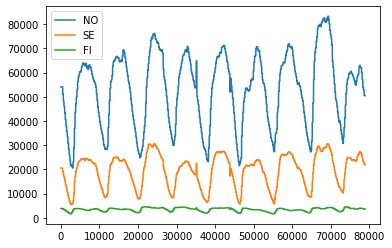

In [11]:
dates_df[additional_cols].plot()

In [12]:
dates_df.to_csv('hydro_levels_nordics_hourly.csv')